## Financial Market Analytics using Machine Learning and Natural Language processing

### Workflow

We have used supervised classification algorithms like Naive Bayes, Random Forest, Logistic Regression, and Support Vector Machines to anticipate the stock price movement and compare the accuracy of different models. In addition, we will perform regression analysis utilizing the Linear Regression technique and the LSTM model (Deep Learning) to forecast stock prices.
Further we will also develop data visualizations with wordcloud and matplotlib to offer a clear understanding of what the data means by putting it in context with graphs.

We have used different NLP methods: 
<br> Bag of words - to extract features from news headlines for modeling.
<br> CountVectorizer - to convert a given headline into a vector based on frequency.
<br> The n-gram model - to determine if the model's prediction accuracy improves or not.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn. preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model    
from matplotlib import rcParams
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Read Excel Data

In [2]:
df1= pd.read_excel("https://raw.githubusercontent.com/kartikj163/is417_project/main/Data/stock_value.xlsx")

### Data Cleaning and Pre-processing

In [3]:
df1.rename(columns={'Close*': 'Close',
                   'Adj Close**': 'Adj Close'},
          inplace=True, errors='raise')

In [4]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Nov 21, 2016",18898.68,18960.76,18883.10,18956.69,18956.69,80520000
1,"Nov 18, 2016",18905.33,18915.74,18853.83,18867.93,18867.93,109880000
2,"Nov 17, 2016",18866.22,18904.03,18845.27,18903.82,18903.82,89940000
3,"Nov 16, 2016",18909.85,18909.85,18825.89,18868.14,18868.14,87320000
4,"Nov 15, 2016",18858.21,18925.26,18806.06,18923.06,18923.06,100660000
...,...,...,...,...,...,...,...
2219,"Jan 31, 2008",12438.28,12702.38,12249.93,12650.36,12650.36,394330000
2220,"Jan 30, 2008",12480.14,12681.41,12406.17,12442.83,12442.83,334680000
2221,"Jan 29, 2008",12385.19,12503.15,12346.99,12480.30,12480.30,285090000
2222,"Jan 28, 2008",12205.71,12386.01,12112.14,12383.89,12383.89,278990000


In [5]:
df1.Date = pd.to_datetime(df1.Date, format='%b %d, %Y')

In [6]:
df1 = df1.sort_values(by='Date',ascending=True)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2223,2008-01-25,12391.70,12486.89,12183.68,12207.17,12207.17,393660000
2222,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000
2221,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000
2220,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000
2219,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000


In [7]:
df1.reset_index(inplace=True)

In [8]:
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

In [9]:
df1.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,2223,2008-01-25,12391.70,12486.89,12183.68,12207.17,12207.17,393660000
1,2222,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000
2,2221,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000
3,2220,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000
4,2219,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000


In [10]:
df1['Stock Label'] = [1 if df1['Close'][i] > df1['Open'][i] else 0 for i in range(len(df1))]

In [11]:
df1['Year'] = pd.DatetimeIndex(df1['Date']).year

In [12]:
df1.isnull().sum()

index          0
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Stock Label    0
Year           0
dtype: int64

In [13]:
df1

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year
0,2223,2008-01-25,12391.70,12486.89,12183.68,12207.17,12207.17,393660000,0,2008
1,2222,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000,1,2008
2,2221,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000,1,2008
3,2220,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000,0,2008
4,2219,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000,1,2008
...,...,...,...,...,...,...,...,...,...,...
2219,4,2016-11-15,18858.21,18925.26,18806.06,18923.06,18923.06,100660000,1,2016
2220,3,2016-11-16,18909.85,18909.85,18825.89,18868.14,18868.14,87320000,0,2016
2221,2,2016-11-17,18866.22,18904.03,18845.27,18903.82,18903.82,89940000,1,2016
2222,1,2016-11-18,18905.33,18915.74,18853.83,18867.93,18867.93,109880000,0,2016


### We utilize Pandas describe() method to gain a high-level picture of how the market has done over the last few months.

In [14]:
df1.iloc[-90:].describe().astype(int)

,index,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year
count,90,90,90,90,90,90,90,90,90
mean,44,18375,18439,18307,18378,18378,89496444,0,2016
std,26,228,219,240,240,240,27901708,0,0
min,0,17928,17986,17883,17888,17888,60090000,0,2016
25%,22,18184,18258,18117,18168,18168,74412500,0,2016
50%,44,18386,18417,18289,18373,18373,84750000,0,2016
75%,66,18533,18570,18469,18533,18533,95787500,1,2016
max,89,18909,18960,18883,18956,18956,278510000,1,2016


### In last 90 days, the average closing price of market was about 18378.
### For about 75% of time, the market was trading below 18533 and the maximum close value was 18956. The maximum volume of shares traded on a single day was 278510000 with median quantity being 84750000.

In [15]:
df1.index = df1["Date"]

### Plotting the closing price (adjusted) of the market over the period to get an idea of the performance for the given period.

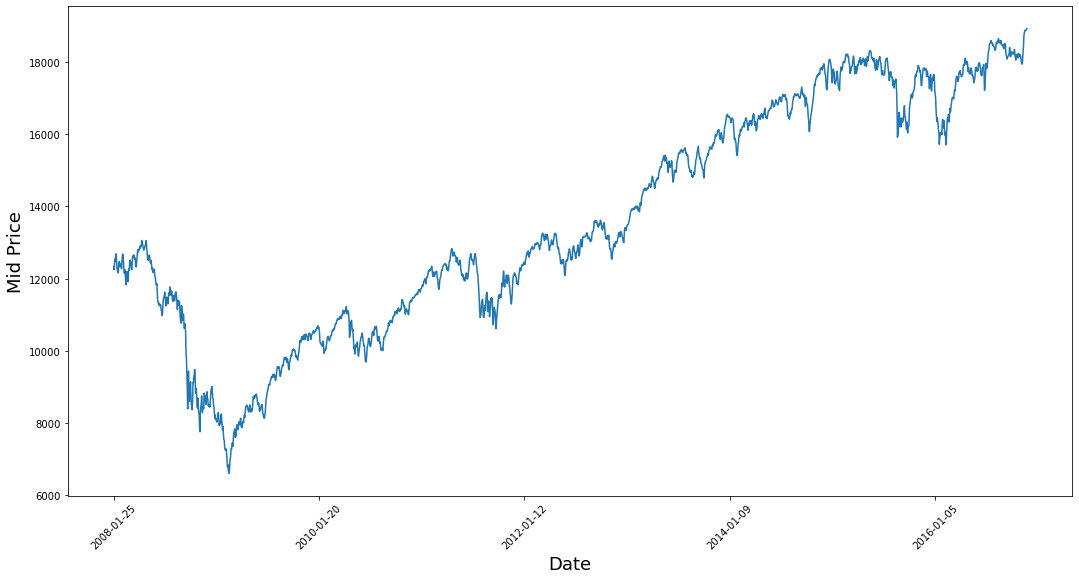

In [16]:
plt.figure(figsize = (18,9))
plt.plot(range(df1.shape[0]),(df1['Low']+df1['High'])/2.0)
plt.xticks(range(0,df1.shape[0],500),df1['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### Daily percentage change in the price of the market is calculated on the basis of percentage change between closing price of consecutive days. Let’s say if the closing price of the market yesterday was 500 and today the market closed at 550. The percentage change is 10%. i.e. ((550–500) / 500)*100.

In [17]:
df1["Daily % Change"] = df1["Adj Close"].pct_change()*100
df1.dropna(axis = 0, inplace = True)
df1.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year,Daily % Change
Date,,,,,,,,,,,
2008-01-28,2222,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000,1,2008,1.447674
2008-01-29,2221,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000,1,2008,0.778511
2008-01-30,2220,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000,0,2008,-0.300233
2008-01-31,2219,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000,1,2008,1.667868
2008-02-01,2218,2008-02-01,12638.17,12767.74,12602.32,12743.19,12743.19,379580000,1,2008,0.733813


<AxesSubplot:xlabel='Date'>

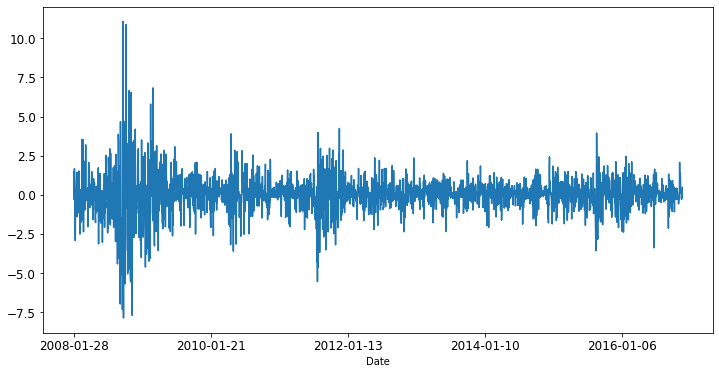

In [18]:
df1['Daily % Change'].plot(figsize = (12, 6), fontsize = 12)

### It can be observed that for most of the days, the returns are between -2% to 2% with few spikes in between crossing 5% mark on both the sides.

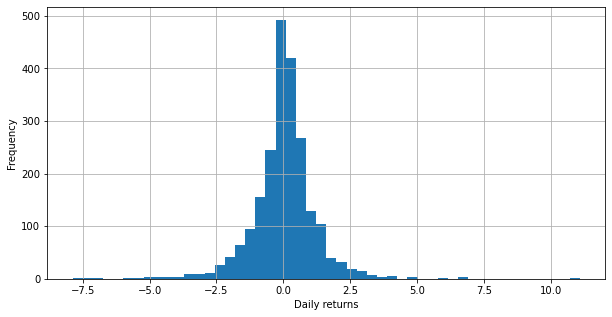

count    2223.000000
mean        0.027530
std         1.243963
min        -7.873277
25%        -0.447137
50%         0.049197
75%         0.560034
max        11.080333
Name: Daily % Change, dtype: float64

In [19]:
df1['Daily % Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
df1['Daily % Change'].describe()

### The daily returns histogram is centered on the origin. The average daily return has been about 0.027, and the daily return has been less than 1% for the bulk of the days, indicating that the market has been less volatile over that time. During this time, the largest positive percent change was 11 percent, while the largest negative percent change was 7.87 percent. 

### Analyzing the Trend


In [20]:
def daily_percent_trend(x):
    
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'

      
df1['Trend_category']= np.zeros(df1['Daily % Change'].count())
df1['Trend_category']= df1['Daily % Change'].apply(lambda x:daily_percent_trend(x))
df1.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year,Daily % Change,Trend_category
Date,,,,,,,,,,,,
2008-01-28,2222,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000,1,2008,1.447674,Positive
2008-01-29,2221,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000,1,2008,0.778511,Slight Positive
2008-01-30,2220,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000,0,2008,-0.300233,Slight or No change
2008-01-31,2219,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000,1,2008,1.667868,Positive
2008-02-01,2218,2008-02-01,12638.17,12767.74,12602.32,12743.19,12743.19,379580000,1,2008,0.733813,Slight Positive


### The market performance can be represented using a pie chart, with each sector representing the percentage of days for the corresponding trend category. We construct a pie chart for the 'Trend' column to see the relative frequency of each trend type. We use the groupby() method with the trend column to aggregate all days with the same trend into a single group before creating the pie chart.

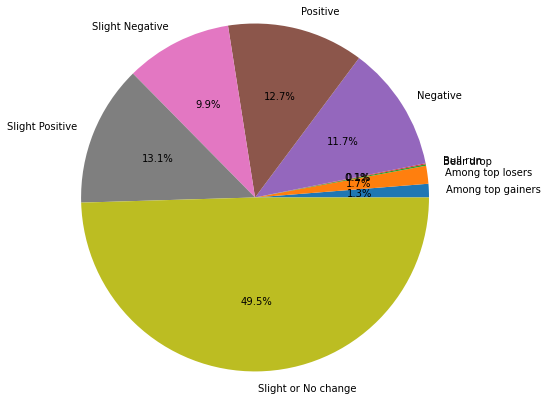

In [21]:
df1_pie_plot_data = df1.groupby('Trend_category')
pie_label = sorted([i for i in df1.loc[:, 'Trend_category'].unique()])
plt.pie(df1_pie_plot_data['Trend_category'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

### Machine Learning - Linear Regression

### To predict the future, we establish a variable equal to 1000 days in the future. We add a new column to our dataframe that will serve as the label, also known as output in machine learning. To fill the output data with data to train on, we set the prediction column equal to our Close value. Although the column is close, it is 1000 units higher.

In [22]:
future_days = 1000
df1["Prediction"] = df1[["Close"]].shift(-future_days)
df1.tail(4)

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year,Daily % Change,Trend_category,Prediction
Date,,,,,,,,,,,,,
2016-11-16,3,2016-11-16,18909.85,18909.85,18825.89,18868.14,18868.14,87320000,0,2016,-0.290228,Slight or No change,NaN
2016-11-17,2,2016-11-17,18866.22,18904.03,18845.27,18903.82,18903.82,89940000,1,2016,0.189102,Slight or No change,NaN
2016-11-18,1,2016-11-18,18905.33,18915.74,18853.83,18867.93,18867.93,109880000,0,2016,-0.189856,Slight or No change,NaN
2016-11-21,0,2016-11-21,18898.68,18960.76,18883.10,18956.69,18956.69,80520000,1,2016,0.470428,Slight or No change,NaN


In [23]:
df1 = df1[['Date','Open','High','Low','Close','Adj Close','Prediction','Volume']]

In [24]:
X = np.array(df1.drop(["Prediction", "Date"], 1))[:-future_days]

C:\Users\rajat\AppData\Local\Temp/ipykernel_21872/768036158.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df1.drop(["Prediction", "Date"], 1))[:-future_days]


In [25]:
y = np.array(df1["Prediction"])[:-future_days]

In [26]:
x_train, x_test ,y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [27]:
model = LinearRegression().fit(x_train, y_train)

In [28]:
x_future_data = df1.drop(["Prediction","Date"], 1)[:-future_days]
x_future_data = x_future_data.tail(future_days)
x_future_data = np.array(x_future_data)
x_future_data

C:\Users\rajat\AppData\Local\Temp/ipykernel_21872/3565069977.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future_data = df1.drop(["Prediction","Date"], 1)[:-future_days]


array([[8.563100e+03, 8.682570e+03, 8.347810e+03, 8.629680e+03,
        8.629680e+03, 2.710300e+08],
       [8.628810e+03, 8.676280e+03, 8.469030e+03, 8.564530e+03,
        8.564530e+03, 2.299400e+08],
       [8.565650e+03, 8.958790e+03, 8.565650e+03, 8.924140e+03,
        8.924140e+03, 3.371900e+08],
       ...,
       [1.297735e+04, 1.306256e+04, 1.296192e+04, 1.302182e+04,
        1.302182e+04, 1.136200e+08],
       [1.302205e+04, 1.305374e+04, 1.298868e+04, 1.302558e+04,
        1.302558e+04, 1.710700e+08],
       [1.302773e+04, 1.308732e+04, 1.295942e+04, 1.296560e+04,
        1.296560e+04, 1.129000e+08]])

C:\Users\rajat\AppData\Local\Temp/ipykernel_21872/883509884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


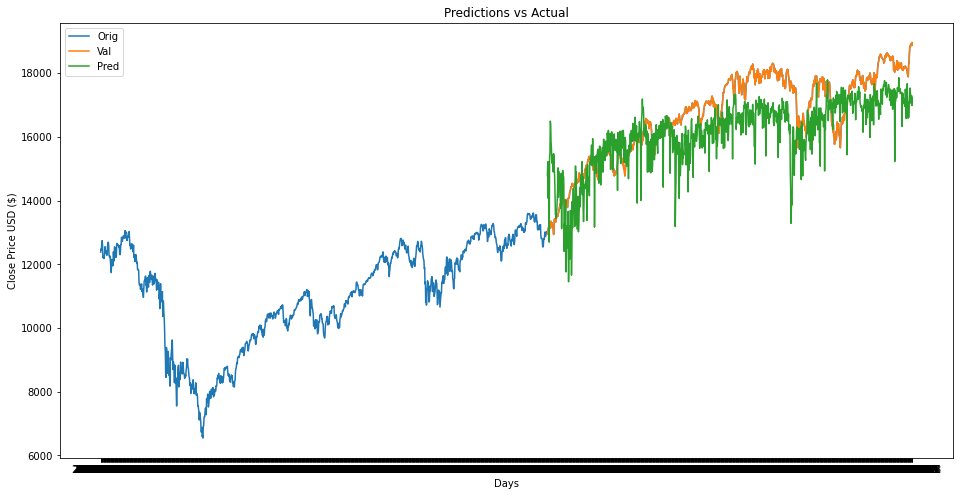

In [29]:
prediction = model.predict(x_future_data)
predictions = prediction
valid = df1[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize = (16, 8))
plt.title("Predictions vs Actual")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df1["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])

In [30]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x_test, y_test))

Variance score: 0.34


In [31]:
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,model.predict(x_test)))
print("Mean Absolute error: %.2f" % metrics.mean_absolute_error(y_test,model.predict(x_test)))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))

Mean squared error: 2249066.19
Mean Absolute error: 1169.21
RMSE: 1499.69


### LSTM

In [32]:
data_frame_stock = df1[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close','Volume']]

In [33]:
data_frame_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-01-28,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000
2008-01-29,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000
2008-01-30,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000
2008-01-31,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000
2008-02-01,2008-02-01,12638.17,12767.74,12602.32,12743.19,12743.19,379580000


### Feature Distribution Visualization
The distribution of features is depicted in the diagram below. With this graph, you can gain a better understanding of the features and coefficient of the determination score. A heat map is created by over-index attributes. The relationship between the data set's specified features, such as Open, High, Low, Close, and Adj Close, can be displayed here. There is no correlation between the other features when we look at the Volume point in the heat map, which is a distinct feature. As a result, while making projections, it should be ruled out.

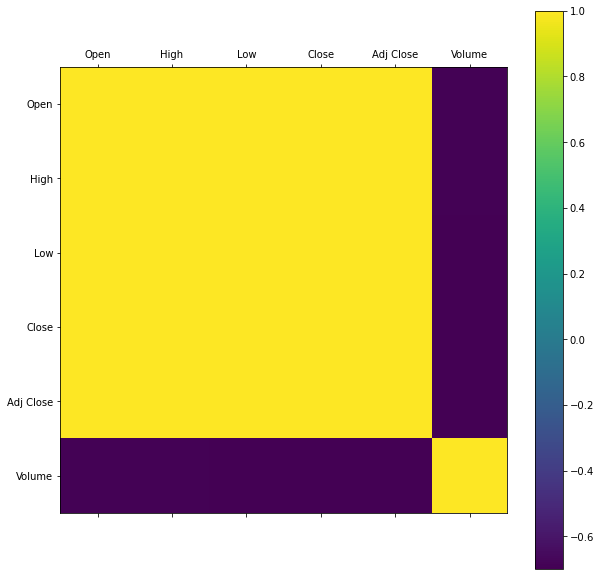

In [34]:
scaling_stock_data = data_frame_stock.filter(['Open','High','Low','Close','Adj Close','Volume'])
## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))
## Transform the data into
scaled_Data = scaler.fit_transform(scaling_stock_data)
## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[data_frame_stock.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )
## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 5, 10
plt.matshow(scaled_data_frame.corr())
plt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
plt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
plt.colorbar()

In [35]:
## Create a seperate dataframe with only close column
stock_close = data_frame_stock.filter(['Close'])

## Convert created dataframe into numpy array
stock_close_dataset = stock_close.values

## Split dataset for training and testing
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

## Display the training data length
trainingDataLength

1779

In [36]:

## Scaling the data its come under preprocessing stage
## Create feature range into 0,1
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaledData = scaler.fit_transform(stock_close_dataset)

## Display scaled data value
scaledData

array([[0.47034725],
       [0.47811621],
       [0.47509678],
       ...,
       [0.9957396 ],
       [0.9928475 ],
       [1.        ]])

In [37]:
## Create a new dataset which contain scaled value
StockTrainData = scaledData[0:trainingDataLength , :]

## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
    Xtrain.append(StockTrainData[i-60:i, 0])
    Ytrain.append(StockTrainData[i, 0])
    if i<= 61:
        print(Xtrain)
        print(Ytrain)
        print()
    
      

[array([0.47034725, 0.47811621, 0.47509678, 0.49182007, 0.49930054,
       0.49059521, 0.46077727, 0.45553699, 0.45931631, 0.45408892,
       0.45875303, 0.46950274, 0.48391331, 0.46979042, 0.46747206,
       0.46658646, 0.47384211, 0.46232203, 0.47011597, 0.48536219,
       0.494605  , 0.49535925, 0.48632595, 0.4608788 , 0.46027524,
       0.45664097, 0.45996016, 0.44266715, 0.4308457 , 0.41847306,
       0.45204857, 0.44829584, 0.45115652, 0.43547113, 0.43717626,
       0.47105395, 0.44744328, 0.4685285 , 0.48362322, 0.48233067,
       0.47348755, 0.46378541, 0.45685048, 0.46059676, 0.4921424 ,
       0.48848073, 0.4898595 , 0.48852102, 0.48876357, 0.48586341,
       0.48190036, 0.48630984, 0.46563559, 0.46375318, 0.46862117,
       0.48931476, 0.48941307, 0.50785599, 0.50589461, 0.49745037])]
[0.5009146115439286]

[array([0.47034725, 0.47811621, 0.47509678, 0.49182007, 0.49930054,
       0.49059521, 0.46077727, 0.45553699, 0.45931631, 0.45408892,
       0.45875303, 0.46950274, 0.483

In [38]:
## Convert Xtrain data, Ytrain data into numpy array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [39]:
## Reshape the Xtrain data (number of column and number of row)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(1719, 60, 1)

In [40]:
## Develop LSTM model
model = Sequential()

## Assign neurons as 50
neurons = 50

## First LSTM layer
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(neurons, return_sequences= False)) 

## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1))

In [41]:
##Compile  model
## mse= mean squared error
model.compile(optimizer='adam', loss='mse')

In [42]:
## Fiting model with given training dataset
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=210, verbose=2, validation_split=0.2)

Epoch 1/210
28/28 - 8s - loss: 0.0250 - val_loss: 0.0030 - 8s/epoch - 281ms/step
Epoch 2/210
28/28 - 2s - loss: 0.0023 - val_loss: 0.0028 - 2s/epoch - 76ms/step
Epoch 3/210
28/28 - 2s - loss: 6.6566e-04 - val_loss: 4.6896e-04 - 2s/epoch - 78ms/step
Epoch 4/210
28/28 - 2s - loss: 5.7245e-04 - val_loss: 4.3483e-04 - 2s/epoch - 86ms/step
Epoch 5/210
28/28 - 2s - loss: 5.5142e-04 - val_loss: 4.4395e-04 - 2s/epoch - 83ms/step
Epoch 6/210
28/28 - 2s - loss: 5.5449e-04 - val_loss: 4.5237e-04 - 2s/epoch - 67ms/step
Epoch 7/210
28/28 - 2s - loss: 5.4222e-04 - val_loss: 4.7711e-04 - 2s/epoch - 57ms/step
Epoch 8/210
28/28 - 2s - loss: 5.3265e-04 - val_loss: 4.1889e-04 - 2s/epoch - 55ms/step
Epoch 9/210
28/28 - 2s - loss: 5.1667e-04 - val_loss: 4.1872e-04 - 2s/epoch - 56ms/step
Epoch 10/210
28/28 - 2s - loss: 5.1833e-04 - val_loss: 4.1461e-04 - 2s/epoch - 55ms/step
Epoch 11/210
28/28 - 2s - loss: 5.0828e-04 - val_loss: 4.1348e-04 - 2s/epoch - 56ms/step
Epoch 12/210
28/28 - 2s - loss: 4.9590e-04 - 

Epoch 94/210
28/28 - 3s - loss: 1.8991e-04 - val_loss: 1.3807e-04 - 3s/epoch - 103ms/step
Epoch 95/210
28/28 - 2s - loss: 1.8063e-04 - val_loss: 1.1558e-04 - 2s/epoch - 71ms/step
Epoch 96/210
28/28 - 2s - loss: 1.7703e-04 - val_loss: 1.2610e-04 - 2s/epoch - 75ms/step
Epoch 97/210
28/28 - 3s - loss: 1.7779e-04 - val_loss: 1.4307e-04 - 3s/epoch - 95ms/step
Epoch 98/210
28/28 - 2s - loss: 1.7633e-04 - val_loss: 2.2586e-04 - 2s/epoch - 78ms/step
Epoch 99/210
28/28 - 2s - loss: 1.9319e-04 - val_loss: 1.2538e-04 - 2s/epoch - 62ms/step
Epoch 100/210
28/28 - 2s - loss: 1.8631e-04 - val_loss: 1.2926e-04 - 2s/epoch - 61ms/step
Epoch 101/210
28/28 - 2s - loss: 1.7520e-04 - val_loss: 3.8688e-04 - 2s/epoch - 61ms/step
Epoch 102/210
28/28 - 2s - loss: 1.8022e-04 - val_loss: 1.1263e-04 - 2s/epoch - 60ms/step
Epoch 103/210
28/28 - 2s - loss: 1.6489e-04 - val_loss: 1.3507e-04 - 2s/epoch - 61ms/step
Epoch 104/210
28/28 - 2s - loss: 1.7286e-04 - val_loss: 1.5912e-04 - 2s/epoch - 77ms/step
Epoch 105/210
2

28/28 - 2s - loss: 1.4382e-04 - val_loss: 1.1886e-04 - 2s/epoch - 58ms/step
Epoch 186/210
28/28 - 2s - loss: 1.6496e-04 - val_loss: 1.6078e-04 - 2s/epoch - 57ms/step
Epoch 187/210
28/28 - 2s - loss: 1.4319e-04 - val_loss: 1.3109e-04 - 2s/epoch - 54ms/step
Epoch 188/210
28/28 - 2s - loss: 1.4357e-04 - val_loss: 1.0561e-04 - 2s/epoch - 54ms/step
Epoch 189/210
28/28 - 2s - loss: 1.7015e-04 - val_loss: 1.7053e-04 - 2s/epoch - 55ms/step
Epoch 190/210
28/28 - 2s - loss: 1.7186e-04 - val_loss: 1.6424e-04 - 2s/epoch - 58ms/step
Epoch 191/210
28/28 - 2s - loss: 1.3760e-04 - val_loss: 9.5559e-05 - 2s/epoch - 56ms/step
Epoch 192/210
28/28 - 2s - loss: 1.4079e-04 - val_loss: 1.0504e-04 - 2s/epoch - 56ms/step
Epoch 193/210
28/28 - 2s - loss: 1.3623e-04 - val_loss: 9.5516e-05 - 2s/epoch - 56ms/step
Epoch 194/210
28/28 - 2s - loss: 1.4228e-04 - val_loss: 9.7097e-05 - 2s/epoch - 54ms/step
Epoch 195/210
28/28 - 2s - loss: 1.3823e-04 - val_loss: 9.6111e-05 - 2s/epoch - 54ms/step
Epoch 196/210
28/28 - 2s

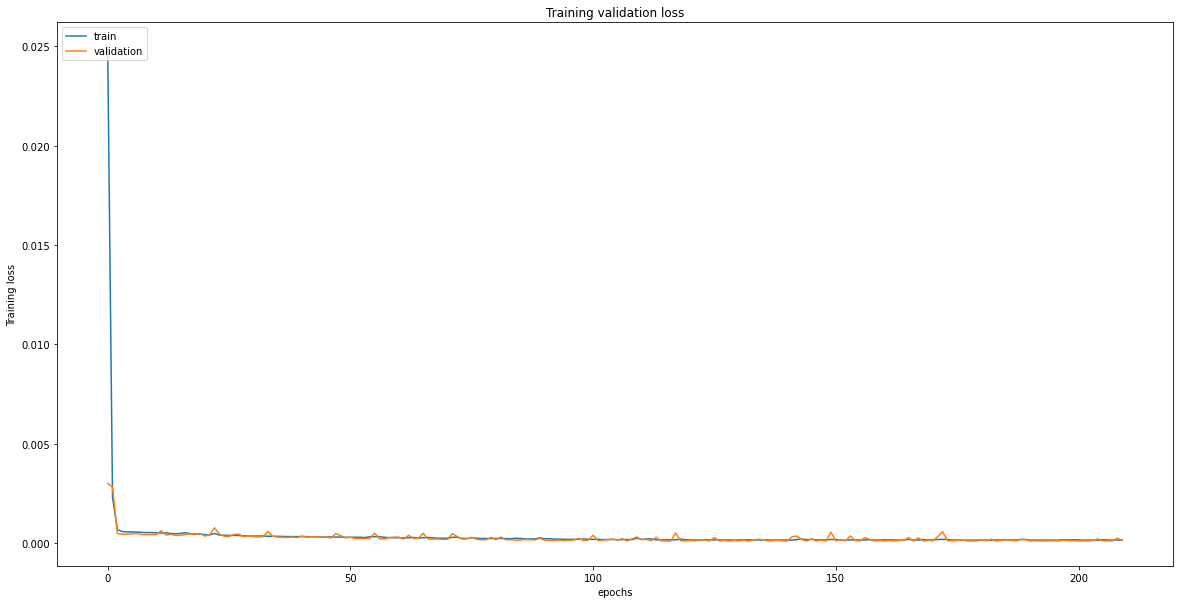

In [43]:
## Visualize train and validation loss
plt.figure(figsize=(20,10))
plt.title('Training validation loss')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'], loc = 'upper left')
plt.show()

In [44]:
##Create testing dataset, new array which contains scaled value from 2275 out of 2843
testingData = scaledData[trainingDataLength - 60: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
    Xtest.append(testingData[i-60:i, 0])

In [45]:
## Convert data into numpy array
Xtest = np.array(Xtest)
Xtest

array([[0.90760167, 0.90823344, 0.90799491, ..., 0.92674163, 0.9253129 ,
        0.92176082],
       [0.90823344, 0.90799491, 0.90902718, ..., 0.9253129 , 0.92176082,
        0.93422452],
       [0.90799491, 0.90902718, 0.90906666, ..., 0.92176082, 0.93422452,
        0.93232277],
       ...,
       [0.96170638, 0.95904152, 0.95476984, ..., 0.99290874, 0.99729001,
        0.99286442],
       [0.95904152, 0.95476984, 0.96343971, ..., 0.99729001, 0.99286442,
        0.9957396 ],
       [0.95476984, 0.96343971, 0.95951615, ..., 0.99286442, 0.9957396 ,
        0.9928475 ]])

In [46]:
## Reshape data from 2 Dimensional to 3 Dimensional
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [47]:
## Get predicted stock price value
## Unscaling the predicted value
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[17906.803 ],
       [18106.902 ],
       [18022.412 ],
       [18157.44  ],
       [18138.246 ],
       [18131.844 ],
       [18034.594 ],
       [18252.527 ],
       [18086.426 ],
       [18002.787 ],
       [18072.744 ],
       [17711.018 ],
       [17977.477 ],
       [17495.127 ],
       [17588.186 ],
       [17871.018 ],
       [17613.559 ],
       [17954.14  ],
       [17707.418 ],
       [18051.492 ],
       [17820.523 ],
       [18093.627 ],
       [18010.025 ],
       [17911.16  ],
       [17586.729 ],
       [17628.229 ],
       [17656.326 ],
       [17961.482 ],
       [17631.74  ],
       [17623.088 ],
       [17702.541 ],
       [17822.883 ],
       [17783.719 ],
       [17827.836 ],
       [17886.264 ],
       [17993.39  ],
       [17869.932 ],
       [17979.58  ],
       [18044.756 ],
       [18020.867 ],
       [17689.158 ],
       [18034.38  ],
       [17835.268 ],
       [17995.107 ],
       [17973.344 ],
       [18004.258 ],
       [17944.018 ],
       [18048

In [48]:
rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

175.3374570857013

C:\Users\rajat\AppData\Local\Temp/ipykernel_21872/1530277456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


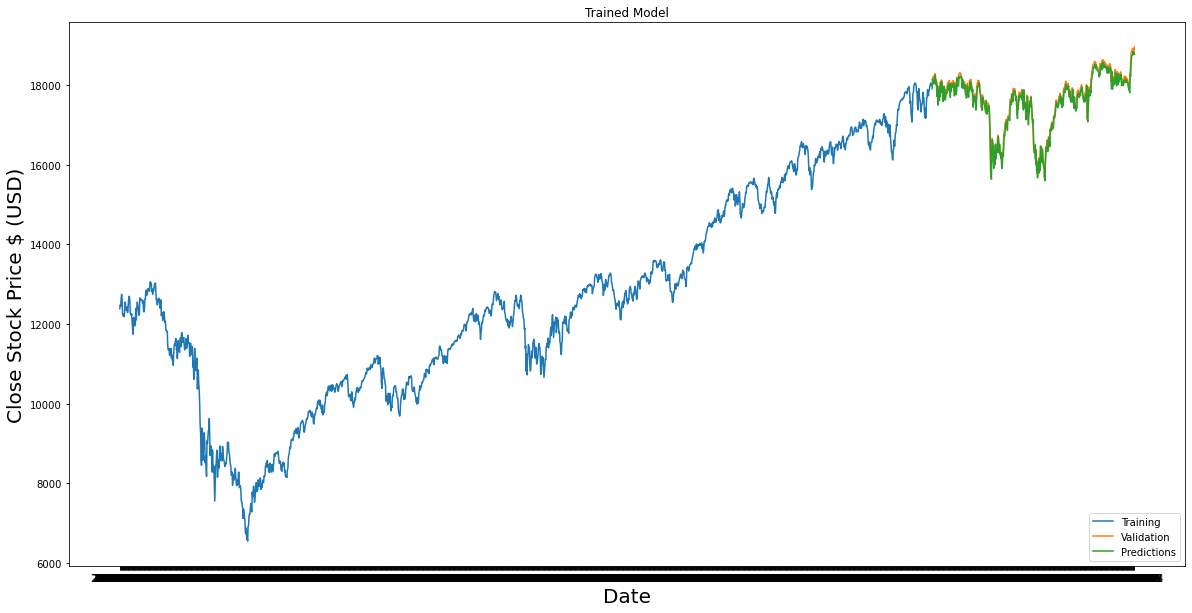

In [49]:
## Ploting data to graph train and validation
training = stock_close[:trainingDataLength]
validation = stock_close[trainingDataLength:]
validation['Predictions'] = predictions

## Visualize trainning, validating and predicting values in graph
plt.figure(figsize=(20,10))
plt.title('Trained Model')
#plt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Stock Price $ (USD)', fontsize=20)
plt.plot(training['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [50]:
## Show  validate and predicted stock prices
validation

,Close,Predictions
Date,,
2015-02-20,18140.44,17906.802734
2015-02-23,18116.84,18106.902344
2015-02-24,18209.19,18022.412109
2015-02-25,18224.57,18157.439453
2015-02-26,18214.42,18138.246094
...,...,...
2016-11-15,18923.06,18771.685547
2016-11-16,18868.14,18840.615234
2016-11-17,18903.82,18761.359375


### Linear Regression vs LSTM:
Regression is a strategy of dealing with linear dependencies; neural networks, on the other hand, can handle nonlinearities.

Linear Regression RMSE: 763.24
LSTM RMSE: 160 

As a result, if your data has nonlinear dependencies, neural networks should outperform regression.

## Read combined dataset

In [53]:
df2 = pd.read_csv('https://raw.githubusercontent.com/kartikj163/is417_project/main/Data/combined_news.csv',
                 encoding = "ISO-8859-1")

In [54]:
df2.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## Split the dataset into train and test

In [55]:
train = df2[df2['Date'] < '2015-01-01']
test = df2[df2['Date'] > '2014-12-31']

In [56]:
train.shape

(1611, 27)

### Combining all the headlines

In [57]:
trainedheadlines = []
for row in range(0,len(train.index)):
    trainedheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [58]:
trainedheadlines[:100]

['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\

### Using Countvectorizer

In [59]:
vectorizer = CountVectorizer()
vectorizer_train = vectorizer.fit_transform(trainedheadlines)
print(vectorizer_train.shape)

(1611, 31675)


This shows that our combined list of headlines has 31675 unique words.

### We create a basic model using Logistic Regression

In [60]:
vectorizer_model = LogisticRegression(solver='lbfgs', max_iter=1000)
vectorizer_model = vectorizer_model.fit(vectorizer_train, train["Label"])

In [61]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
vectorizer_test = vectorizer.transform(testheadlines)
predictions = vectorizer_model.predict(vectorizer_test)

#### The predictions are set, so let's use a crosstab to take a look at the results!
#### The cross-tab is pretty interesting I have never really ised it.

pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,60,126
1,92,100


### Using bag of words and N-grams
Taking bigrams only

In [62]:
vectorizer2 = CountVectorizer(ngram_range=(2,2))
vectorizer_train2 = vectorizer2.fit_transform(trainedheadlines)

In [63]:
vectorizer_model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
vectorizer_model2 = vectorizer_model2.fit(vectorizer_train2, train["Label"])

In [64]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
vectorizer_test2 = vectorizer2.transform(testheadlines)
predictions2 = vectorizer_model2.predict(vectorizer_test2)

In [65]:
pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,62,124
1,43,149


# Application of all Machine Learning methods

In [67]:
train = df2[df2['Date'] < '20150101']
test = df2[df2['Date'] > '20141231']

In [68]:
# Removing punctuations
sub_data= train.iloc[:,2:27]
sub_data.replace(to_replace="[^a-zA-Z]", value=" ", regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
sub_data.columns= new_Index
sub_data.head(5)

# Convertng headlines to lower case
for index in new_Index:
    sub_data[index]=sub_data[index].str.lower()
sub_data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge


In [69]:
headlines = []
for row in range(0,len(sub_data.index)):
    headlines.append(' '.join(str(x) for x in sub_data.iloc[row,0:25]))

In [70]:
basicvectorizer = CountVectorizer(ngram_range=(2,2))
basictrain = basicvectorizer.fit_transform(headlines)

In [71]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)

In [72]:
MLA = [
    #GLM
    linear_model.LogisticRegression(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    
    ensemble.RandomForestClassifier(n_estimators=200, criterion='entropy',max_features='auto'),
    
    
    #SVM
    svm.SVC(C=1, class_weight='balanced',kernel='rbf', gamma=0.100000000000000000000001, tol=1e-10),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    
    ]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    #predicted = alg.fit(x_train, y_train).predict(x_test)
    predicted = alg.fit(basictrain, train["Label"]).predict(basictest)
    #fp, tp, th = roc_curve(basictest, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(basictest, test["Label"]), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(test["Label"], predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(test["Label"], predicted)
    #MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Test Accuracy,Precission,Recall
2,RandomForestClassifier,0.8519,0.776423,0.994792
4,BernoulliNB,0.8519,0.774194,1.000000
3,SVC,0.8492,0.771084,1.000000
0,LogisticRegression,0.8466,0.831683,0.875000
1,AdaBoostClassifier,0.6376,0.682119,0.536458


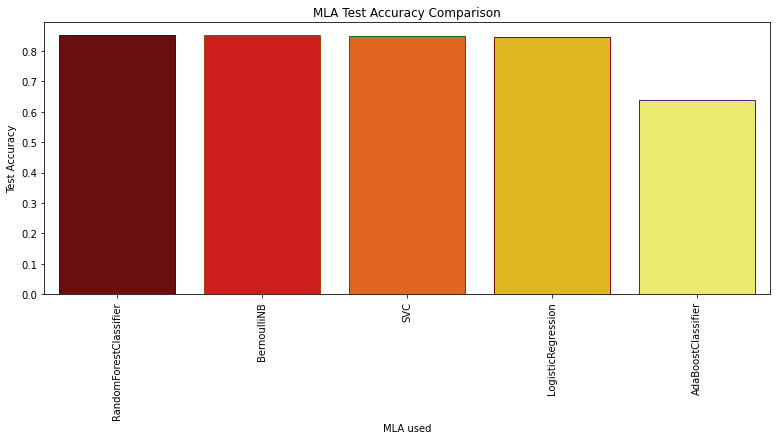

In [73]:
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()